# Langauge Similariy : Analysing Results of XLMR

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.ticker import FormatStrFormatter
import seaborn as sns
from statistics import mean, variance
%matplotlib inline

1) Read in results:

In [2]:
lan_results_raw = pd.read_csv('LanSimilarity_results_XLMR.csv', sep=',')
lan_results_raw.head()

,DIST,LAN_1,LAN_2,f1_1,f1_2,f1_3,f1_4,f1_avg,eval_loss_1,eval_loss_2,...,prec_1,prec_2,prec_3,prec_4,prec_avg,rec_1,rec_2,rec_3,rec_4,rec_avg
0,0.0,Fr,Fr,0.866817,0.855839,0.846487,0.858048,0.856798,0.237300,0.230261,...,0.858101,0.845579,0.838022,0.851112,0.848203,0.875713,0.866351,0.855124,0.865099,0.865572
1,0.0,Cz,Cz,0.881422,0.880938,0.882038,0.881679,0.881519,0.147248,0.137250,...,0.874367,0.877421,0.872426,0.875873,0.875022,0.888591,0.884484,0.891864,0.887563,0.888126
2,0.0,Hng,Hng,0.890467,0.898860,0.895032,0.895287,0.894912,0.118549,0.115778,...,0.879780,0.895955,0.886442,0.886019,0.887049,0.901417,0.901784,0.903791,0.904752,0.902936
3,0.0,Swd,Swd,0.967869,0.957546,0.963180,0.967213,0.963952,0.033908,0.037877,...,0.968154,0.954052,0.959899,0.963597,0.961426,0.967583,0.961065,0.966484,0.970856,0.966497
4,0.0,Swd,Nor,0.766677,0.733927,0.739175,0.749757,0.747384,0.485973,0.571509,...,0.760290,0.720173,0.727876,0.739531,0.736968,0.773171,0.748216,0.750830,0.760269,0.758121


2) Data Transformation - changing formatting

In [3]:
lan_results_f1 = lan_results_raw[['DIST','LAN_1', 'LAN_2', 'f1_1','f1_2','f1_3','f1_4']]
    
lan_results_f1 = lan_results_f1.reindex(columns = ['DIST','LAN_1', 'LAN_2','f1_1','f1_2','f1_3','f1_4','mean','variance', 'standard dev'])

lan_results_f1['f1_1'] = lan_results_f1['f1_1'].apply(lambda x: x*100)
lan_results_f1['f1_2'] = lan_results_f1['f1_2'].apply(lambda x: x*100)
lan_results_f1['f1_3'] = lan_results_f1['f1_3'].apply(lambda x: x*100)
lan_results_f1['f1_4'] = lan_results_f1['f1_4'].apply(lambda x: x*100)

for index, row in lan_results_f1.iterrows():
    
    if row['f1_4'] == 0:
        lan_results_f1.at[index,'mean'] = np.mean([row['f1_1'],row['f1_2'],row['f1_3']])
        lan_results_f1.at[index,'variance'] = np.var([row['f1_1'],row['f1_2'],row['f1_3']])
        lan_results_f1.at[index,'standard dev'] = np.std([row['f1_1'],row['f1_2'],row['f1_3']])
    else:
        lan_results_f1.at[index,'mean'] = np.mean([row['f1_1'],row['f1_2'],row['f1_3'],row['f1_4']])
        lan_results_f1.at[index,'variance'] = np.var([row['f1_1'],row['f1_2'],row['f1_3'],row['f1_4']])
        lan_results_f1.at[index,'standard dev'] = np.std([row['f1_1'],row['f1_2'],row['f1_3'],row['f1_4']])

lan_results_f1[lan_results_f1['DIST']==1.0]

,DIST,LAN_1,LAN_2,f1_1,f1_2,f1_3,f1_4,mean,variance,standard dev
49,1.0,Wel,Tat,41.004969,55.381552,35.204567,47.566064,44.789288,56.523620,7.518219
50,1.0,Grg,Arm,44.559945,50.424654,45.843098,49.157535,47.496308,5.672555,2.381713
51,1.0,Grg,Est,63.054599,66.887143,65.471755,64.928020,65.085379,1.886118,1.373360
52,1.0,Ltv,Pol,73.141958,72.507614,75.390625,72.940475,73.495168,1.250115,1.118086
53,1.0,Ukr,Blg,81.642240,84.903581,83.470442,84.249977,83.566560,1.491733,1.221365
54,1.0,Ukr,SCr,51.442250,46.237044,42.339833,51.611386,47.907628,15.000642,3.873066
55,1.0,Pol,Blg,83.899669,82.415136,81.729668,82.704956,82.687357,0.615321,0.784424
56,1.0,Ukr,Lit,73.633940,68.380297,73.856064,76.787679,73.164495,9.178665,3.029631
57,1.0,Ukr,Ltv,58.258065,63.589413,65.733203,64.340407,62.980272,8.024723,2.832794
58,1.0,Sln,Blg,81.012888,79.647659,81.097176,78.825623,80.145836,0.911993,0.954983


3) Analysing monolingual results - mean/ variance

In [4]:
monolingual = lan_results_f1[(lan_results_f1['DIST'] == 0.0) & (lan_results_f1['LAN_1'] == lan_results_f1['LAN_2'])]
monolingual = monolingual.sort_values(by = "mean", ascending = False)
monolingual

,DIST,LAN_1,LAN_2,f1_1,f1_2,f1_3,f1_4,mean,variance,standard dev
47,0.0,Tat,Tat,96.981891,97.754011,96.959298,97.038328,97.183382,0.109367,0.330708
3,0.0,Swd,Swd,96.786872,95.754577,96.318000,96.721311,96.395190,0.169028,0.411131
9,0.0,Alb,Alb,94.893734,93.825799,93.916610,94.595715,94.307965,0.202892,0.450436
21,0.0,SCr,SCr,94.133513,93.500936,93.301625,93.363661,93.574934,0.109205,0.330462
34,0.0,Bsq,Bsq,92.178615,92.393146,92.558881,91.593428,92.181018,0.133262,0.365051
43,0.0,Blg,Blg,91.696479,91.761796,91.872092,90.850048,91.545104,0.164974,0.406169
38,0.0,Sln,Sln,91.753666,91.573162,91.273585,91.399260,91.499918,0.032778,0.181046
8,0.0,Rom,Rom,90.904523,91.288026,91.875475,90.980392,91.262104,0.146030,0.382139
25,0.0,Arm,Arm,90.995995,90.992048,91.164606,91.400364,91.138253,0.027752,0.166591
44,0.0,Ukr,Ukr,90.349650,90.939498,90.780425,91.208791,90.819591,0.097058,0.311542


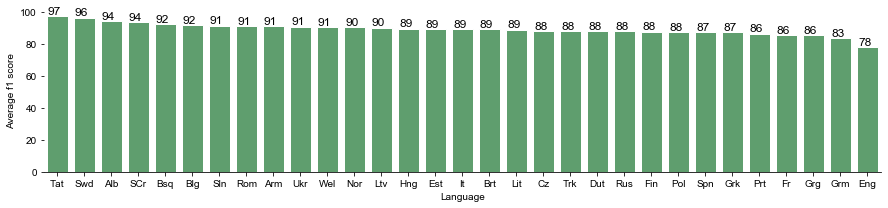

In [5]:
#plot the results

x = monolingual['LAN_1'].values
y = monolingual['mean'].values

plt.figure(figsize=(15,3))
plt.ylabel('Average f1 score')
plt.xlabel('Language')
sns.set(style="whitegrid")
sns.despine(left=True)
graph = sns.barplot(x, y, color='g', )
for p in graph.patches:
        graph.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()),
                    ha='center', va='bottom',
                    color= 'black')
graph

In [6]:
monolingual.to_csv('Monolingual_results_XLMR.csv', index=False)

4) Analysing results per distance

In [7]:
average_results = {}

#filer out not done experiments
lan_results_f1_fil_temp1 = lan_results_f1[(lan_results_f1['f1_1'] != 0) & (lan_results_f1['f1_2'] != 0) & (lan_results_f1['f1_3'] != 0) & (lan_results_f1['f1_4'] != 0)].reset_index()

#filter out monolingual results and results with stdv > 10
lan_results_f1_fil = lan_results_f1_fil_temp1[lan_results_f1_fil_temp1['LAN_1'] != lan_results_f1_fil_temp1['LAN_2']].reset_index()

#print(lan_results_f1_fil)
#filter out high standard deviation
lan_results_f1_fil = lan_results_f1_fil[lan_results_f1_fil['standard dev'] < 7.0]


lan_results_f1_fil.loc[:,'common_features'] = pow(lan_results_f1_fil['DIST'],2)
#print(lan_results_f1_fil['common_features'].unique())
lan_results_f1_fil['common_features'] = lan_results_f1_fil['common_features'].apply(lambda x: 12 - int(x))
#print(lan_results_f1_fil['common_features'].unique())

for dist in lan_results_f1_fil['common_features'].unique():
    df_temp = lan_results_f1_fil[(lan_results_f1_fil['common_features'] == dist)]
    count = len(df_temp['mean'].values)
    mean = np.mean(df_temp['mean'].values)
    #! the standard deviation of the language pair means
    std = np.std(df_temp['mean'].values)
    #! the standard deviation of 4 iterations represented as mean over all language pairs
    std_4 = np.mean(df_temp['standard dev'].values)
    
    
    average_results[dist] = [mean, std, std_4, count]

results_per_dist = pd.DataFrame.from_dict(average_results, orient = 'index', columns=['f1_mean_over_lan_pairs','f1_std_over_lan_pairs','std_over_4_it','number_of_pairs']).reset_index().sort_values(by = 'index', ascending=False)
results_per_dist.rename({'index' : 'shared features'},axis='columns')

,shared features,f1_mean_over_lan_pairs,f1_std_over_lan_pairs,std_over_4_it,number_of_pairs
0,12,72.499837,11.176768,1.603602,17
1,11,65.013586,13.283142,1.730123,36
2,7,65.521596,11.520553,1.676272,37
3,2,63.693693,10.418518,1.577128,31
4,1,59.948789,12.184459,1.888059,13


In [8]:
np.mean(results_per_dist['f1_std_over_lan_pairs'])

11.716687675164312

In [9]:
lan_results_f1_fil.to_csv('Shared_Features_XLMR.csv')

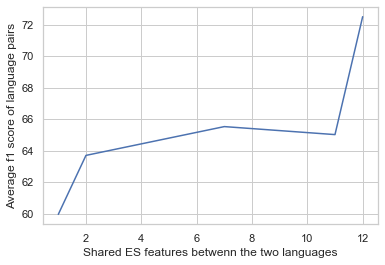

In [10]:
# plotting the results
x = results_per_dist['index'].values
y = results_per_dist['f1_mean_over_lan_pairs'].values

plt.plot(x, y, 'b')
plt.ylabel('Average f1 score of language pairs')
plt.xlabel('Shared ES features betwenn the two languages')
plt.show()